C:\Users\Akanksha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


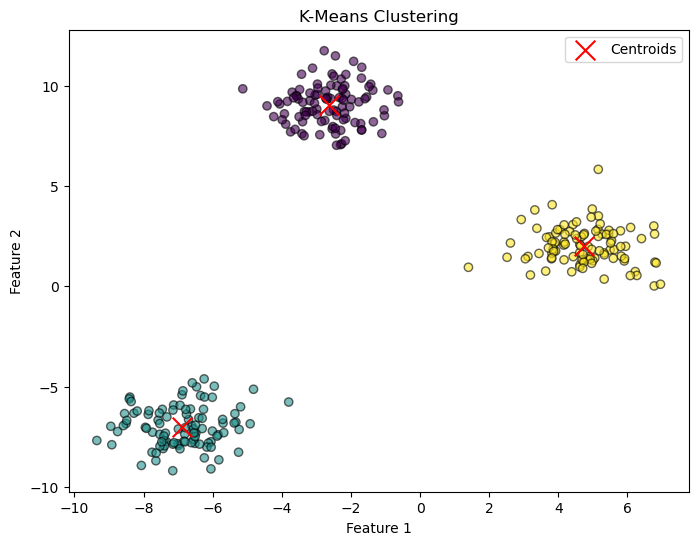

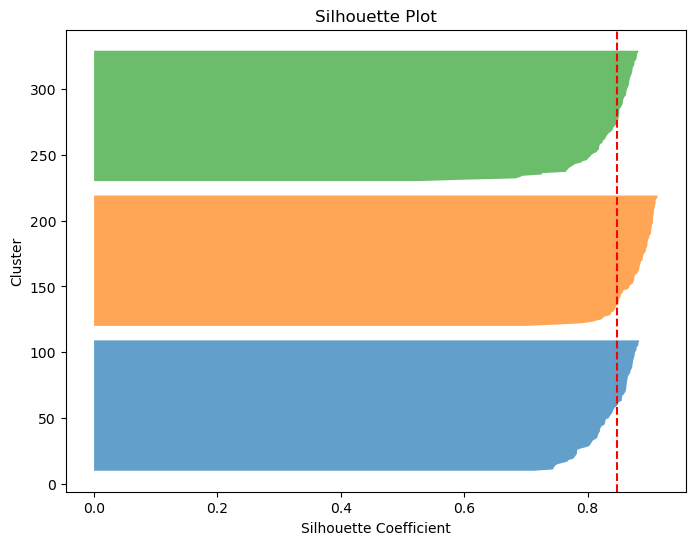

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs

# Generate synthetic data for clustering
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=random_state)
#make_blobs generates artificial data points grouped into 3 clusters

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=random_state)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Compute silhouette scores
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Silhouette plot
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color='red', linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()
